In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from wtl2 import WtL2

## Intialization

In [2]:
# Select device used for the tracer model
device = torch.accelerator.current_accelerator(True) if torch.accelerator.is_available() else "cpu"

# Specify path to the TracerNet checkpoint file
checkpoint_path = "../checkpoints/tracer_net.pth"

# Initialize model
wtl = WtL2(checkpoint_path, device)

## Load data and apply algorithm

In [ ]:
# Read image as BGR and convert it to RGB
img = cv2.imread("data/rgb/giraffe.jpg")[...,::-1]

# Read soft contour map as 16-bit grayscale image
cont = cv2.imread("data/scm/giraffe.png", -1)

# Apply Walk the Lines 2 and save results to file
result = wtl.tracer_walk(img, cont)
cv2.imwrite("data/tracer_walk/giraffe.png", result)

Running Tracers [flipped=False]: 100%|██████████| 436/436 [00:09<00:00, 43.82it/s]


True

## Visualize results

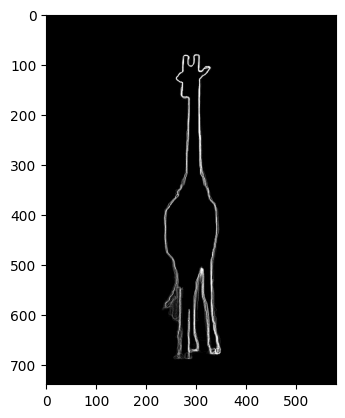

In [4]:
plt.imshow(result, cmap='gray')
plt.show()